## Calcular Pi con Montecarlo

Veamos como podemos usar el método de Montecarlo para calcular el valor de Pi.

Sabemos que:
$$
\text{Área Circulo} = \pi r^2
$$

si $r = 1$ entonces

$$
\text{Área Circulo} = \pi 
$$
### 
Primero, en el siguiente código calculamos el área de un cuarto de círculo de radio 1, simulando puntos que van desde 0 a 1, por lo tanto podemos calcular el área de un cuarto de círculo, y multiplicar nuestro resultado por 4





Aproximación Pi = 3.1184


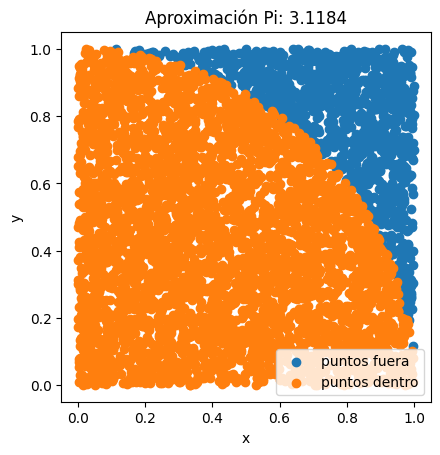

In [8]:
from numpy import random
import matplotlib.pyplot as plt 

# Inicializo mis variables
N = 5000            # número de simulaciones
puntos_dentro = 0   
x_dentro = []       
y_dentro = []
x_fuera = []
y_fuera = []

# Simulo N puntos aleatorios
for i in range(N):
    # random devuelve un valor aleatorio entre 0 y 1
    x = random.random() 
    y = random.random()
    # nota: también podría haber usando random.uniform(0, 1)

    # verifico si el punto (x, y) está dentro del círculo
    if x**2 + y**2 <= 1:
        puntos_dentro += 1
        x_dentro.append(x)
        y_dentro.append(y)
    else:
        # en caso de que el punto no esté dentro del círculo:
        x_fuera.append(x)
        y_fuera.append(y)

# resultado de pi
pi_montecarlo = 4*puntos_dentro/N # se multiplica por 4 ya que solo consideramos un cuarto de círculo
print(f"Aproximación Pi = {pi_montecarlo}")

# grafico
plt.scatter(x_fuera, y_fuera, label="puntos fuera")
plt.scatter(x_dentro, y_dentro, label="puntos dentro")
plt.title(f"Aproximación Pi: {pi_montecarlo}")
plt.axis("scaled")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


### Usando la libreria NumPy para un código más eficiente

Veamos como podemos resolver el mismo problema usando la librería NumPy.

El módulo random de numpy me permite simular muchos variables aleatorios en una sola linea de código y hacer operaciones con vectores y matrices gracias a su estructura de dato (el array).

Antes de ver el código completo vayamos por partes, veamos primero como puedo generar un array con varios elementos aleatorios (pensemos por ahora a un array como una lista más eficiente):

In [10]:
from numpy import random

# generamos 5 valores aleatorios entre 0 y 1:
random.random(size=5)

array([0.10852415, 0.89658886, 0.92547434, 0.23693386, 0.61440809])

Si tengo dos arrays `X` e `Y`, y escribo la expresión: 

``X**2 + Y**2 < 1``

el resultado será otro array de boleanos que nos dirá en qué puntos se cumple o no la condición (con un `True` o `False`).


In [20]:
from numpy import random

# Ahora simulo dos arrays con N puntos aleatorios:
N = 8
X = random.random(size=N)   
Y = random.random(size=N)

# veamos que pasa si planteo una condición como la siguiente (el resultado es otro array de tamaño N):
(X**2 + Y**2 < 1)

array([ True, False,  True,  True,  True,  True, False,  True])


Como el resultado es un array de `True`s y `False`s, puedo contar cuantos `True` hay y ese será el número de puntos que cumplen la condición.

Con los arrays de numpy hay una forma muy fácil de hacer esto, simplemente usamos un método llamado `sum()`:

```
(X**2 + Y**2 < 1).sum()
```


In [22]:
from numpy import random

# Ahora simulo dos arrays con N puntos aleatorios:
N = 8
X = random.random(size=N)   
Y = random.random(size=N)

# puedo obtener los puntos dentro del cuarto de círculo de la siguiente manera:
puntos_dentro = (X**2 + Y**2 < 1).sum()

print(f"Hay {puntos_dentro} puntos dentro")

Hay 7 puntos dentro


De forma que calcular pi es muchisimo más sencillo. Veamos:

In [23]:
from numpy import random

# Ahora simulo dos arrays con N puntos aleatorios:
N = 10000
X = random.random(size=N)   
Y = random.random(size=N)
puntos_dentro = (X**2 + Y**2 < 1).sum()

# aproximación de pi
pi_montecarlo = 4 * puntos_dentro/N

# ya lo hicimos, y en solo unas pocas líneas de código
print(f"Pi aproximado = {pi_montecarlo}")

Pi aproximado = 3.1204


Ahora veamos como podemos graficar esto. En las funciones para graficar de matplotlib (como `scatter` o `plot`) hay un parámetro llamado `c` (de color), que nos permite pasar como parámetro una lista o array que define el color de cada punto. 

Veamos un ejemplo sencillo primero

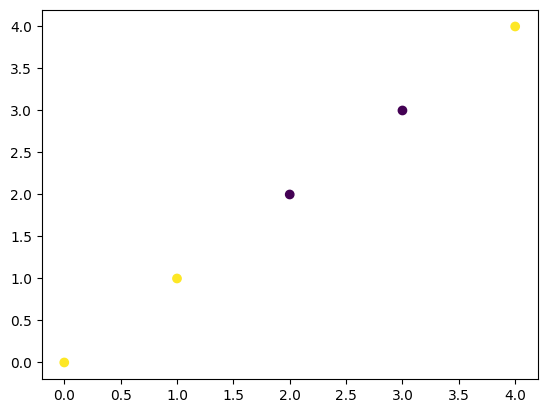

In [30]:
import matplotlib.pyplot as plt

# tenemos dos listas, x e y
x = [0, 1, 2, 3, 4]
y = [0, 1 ,2, 3, 4]

# y una lista llamada color del mismo tamaño que x e y
color = [1, 1, 0, 0, 1]

# al pasar esta lista al parámetro `c` logramos un discriminar los puntos por color
plt.scatter(x, y, c=color)

Ahora sí el código completo para calcular Pi con montecarlo usando NumPy

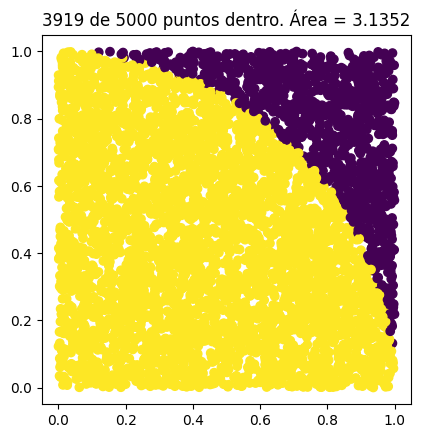

In [19]:
import numpy as np
# notar que el módulo random lo importamos desde numpy:
from numpy import random
import matplotlib.pyplot as plt 

# simulo N puntos en dos dimensiones
N = 5000
X = random.random(size=N)   
Y = random.random(size=N)

# puntos que ingresan al área
Na = (X**2 + Y**2 < 1).sum()

# el área es 4 veces Na/N ya que solo consideramos un cuarto de círculo
area = 4* Na / N

# gráfica
plt.title(f"{Na} de {N} puntos dentro. Área = {area}")
plt.scatter(X, Y, c=(X**2 + Y**2 < 1))
plt.axis("scaled")
plt.show()


### Evolución del Error con N

Veamos como evoluciona el error del cálculo de pi a medida que crece `N`

Text(0.5, 0, 'N')

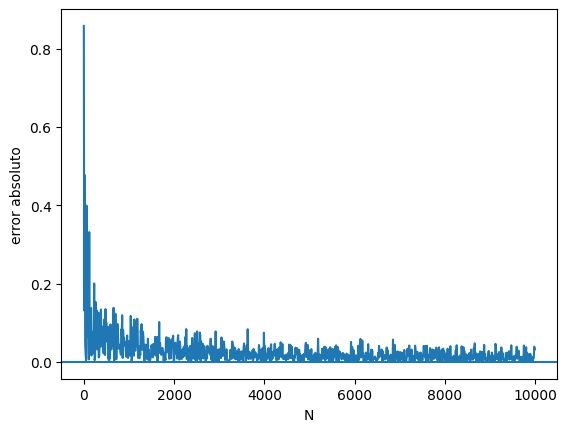

In [15]:
evolucion_error = []
Ns = np.arange(1, 10000, 10)
for N in Ns:
    puntos = random.random(size=(N, 2))
    X = puntos[:, 0]
    Y = puntos[:, 1]

    Na = np.array((X**2 + Y**2 < 1), dtype=int).sum()
    area = 4* Na / N
    evolucion_error.append(abs(area - np.pi))

plt.plot(Ns, evolucion_error) 
plt.axhline(0)
plt.ylabel("error absoluto")
plt.xlabel("N")
#plt.yscale("log")

## Área entre dos funciones

En el caso en el que tengamos que calcular un área entre dos curvas podemos seguir el mismo procedimiento:

Área entre dos funciones: $ y_1 = \sqrt{x}, \ \ y_2 = x^2$

Primero veamos cuando es el área real:
$$
Área = \int_0^1 dx \int_{x^2}^{\sqrt{x}}dy  = \int_0^1 \sqrt{x} dx-\int_0^1  x^2dx \\
Área = 2/3 - 1/3 \\
Área = 1/3 \\
$$


En este caso hay que verificar dos condiciones, es decir, que nuestro punto esté arriba de una función pero por debajo de la otra. 
Para plantear la condición con numpy usamos una multiplicación, indicando que se deben cumplir ambas condiciones. 

Notar que:

```
True * True = True
True * False = False 
False * False = False
```

veamos el código:

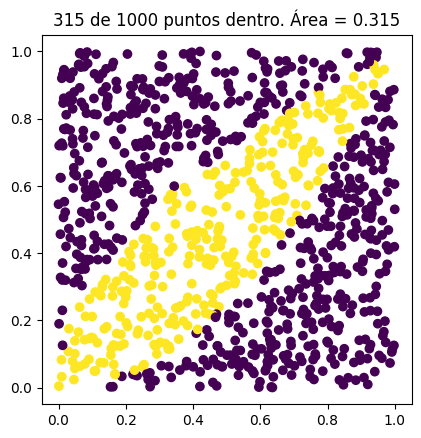

In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt 

# N simulaciones aleatorias
N = 1000
X = random.uniform(0, 1, size=N)
Y = random.uniform(0, 1, size=N)

# Ahora tenemos dos condiciones que se multiplican para denotar el operador AND
condicion = (Y < np.sqrt(X)) * (Y > X**2) 
Na = condicion.sum()
area = Na/N * 1 # 1 es el área del cuadrado, podriamos sacarlo pero bueno

# gráfica
plt.title(f"{Na} de {N} puntos dentro. Área = {area}")
plt.scatter(X, Y, c=condicion)
plt.axis("scaled")
plt.show()

# Integrales Definidas con Montecarlo

Pero también podemos usar una mejor aproximación, y más general:

Tenemos una función genérica $f(x)$ y queremos calcular

$$
\int_{x_a}^{x_b} f(x) dx
$$

Podemos realizar $N$ evaluaciones de la función $f(x)$, y luego sabemos que podemos aproximar la integral como la suma del área de rectángulos de base $h$ y altura $f(x)$, con 

$$ 
h = \frac{x_b - x_a}{N}
$$

Mientras mayor sea N, mejor será la aproximación:

$$
\int_{x_a}^{x_b} f(x) dx \approx \sum_{i=1}^{N} f_i h
$$

con $f_i$ las $N$ evaluaciones de la función


# Integrales Definidas con Métodos de Montecarlo

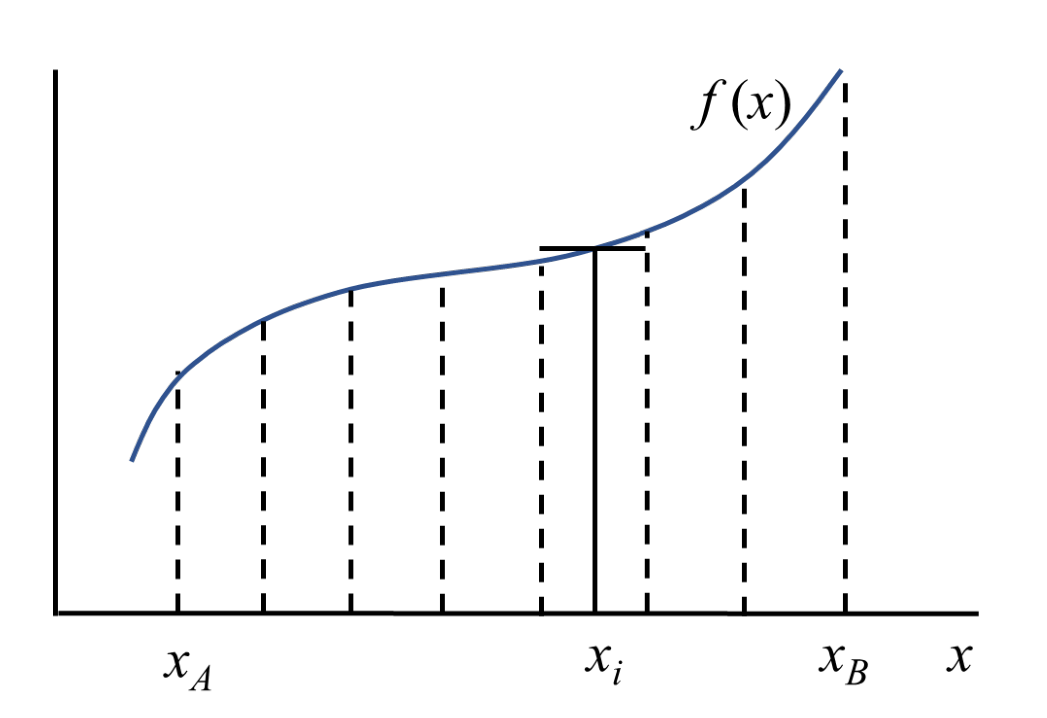

In [9]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt 

# variables
N = 1000
xa = 0
xb = 1
h = (xb-xa)/N

# montecarlo
X = random.uniform(xa, xb, size=N)
area = (np.sqrt(X)*h).sum() - (X**2 * h).sum()

print(f"Área = {area}")

Área = 0.3386315820751888


## Comparación de Métodos

Si quiero calcular un área entre dos curvas, debería usar el método para calcular el área, o debería plantearlo como una integral definida?

La respuesta es que siempre es mejor plantear la integral y resolver usando el último método que vimos. A continuación vemos un histograma con los resultados de 100 simulaciones diferentes

Text(0.5, 0, 'área')

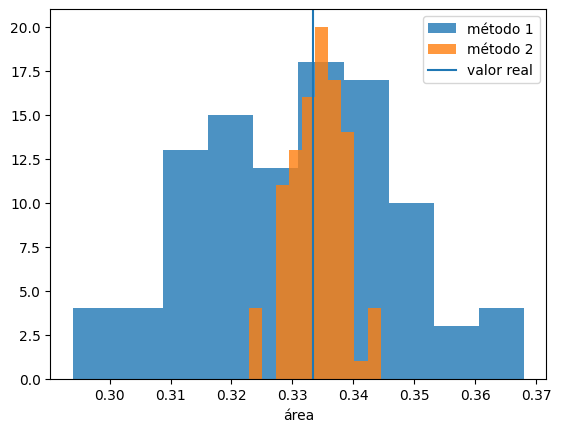

In [5]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt 

# variables
N = 1000    # N puntos aleatorios
sim = 100    # num simulaciones
h = 1/N

# Método 1 (calcular area)
X = random.uniform(0, 1, size=(N, sim))
Y = random.uniform(0, 1, size=(N, sim))
condicion = (Y < np.sqrt(X)) * (Y > X**2)
Na = condicion.astype(int).sum(axis=0)
area_metodo_1 = Na/N 

# Método 2 (calcular integral)
X = random.uniform(0, 1, size=(N, sim))
area_metodo_2= ((np.sqrt(X)*h) - (X**2 * h)).sum(axis=0)

plt.hist(area_metodo_1, alpha=0.8, label="método 1")
plt.hist(area_metodo_2, alpha=0.8, label="método 2")
plt.axvline(1/3, label="valor real")
plt.legend()
plt.xlabel("área")